# HW4 – Statistics and Data Analysis
## Differential Gene Expression in Acute Myocardial Infraction 

by Millis Sahar  
ID 300420379  

Hide warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

Disabling autoscrolling for long output:

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

Make sure tab will autocomplete

In [3]:
%config IPCompleter.greedy=True

<br><br><br>
<br><br><br>
<br><br><br>

## 1.	Introduction
Gene expression describes the process in which genes that are coded in the DNA of living organisms are transcribed into mRNA.  
This is part of the bigger process in which genes are being copied (transcribed), processed, translated and modified into the final product, usually a protein.  
Gene expression profiling measures the levels at which mRNA molecules pertaining to the genes profiled are observed in a sample.  

In this exercise, we will perform guided analysis, comparing expression profiles of circulating endothelial cells (CECs) in patients with acute myocardial infraction to CECs in healthy controls.  
A comparison of two sample classes. You will then select one more gene expression dataset and perform your own analysis there.  


## 2.	The Data Set
The data set was taken from:  
1)	Dataset record in NCBI:  
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66360  

2)	Published paper: Muse et al, Sci Rep 2017   
https://www.nature.com/articles/s41598-017-12166-0  

3)  Dowload:  
We extracted the data matrix and provide it as a separate csv attachment   
https://drive.google.com/file/d/1-mu1J2wnlDIVNzoCXw20jJQ9r-h1jGrZ/view) 

<br>

The csv file needs to be pre-processed before moving to the main analysis steps.  
Some information should be removed but make sure that you keep all information that is important for the analysis.  
The paper describes a study that seeks to develop an expression-based signature that can detect AMI in patients in a non-invasive manner, by profiling CECs. 


### preprocess

Get the dataset inside the text file into a dataframe
- Look at the first 100th rows
- Get the initial row of the data
- Create a dataframe with the dataset
- Indexing
- Transpose
- Header

In [4]:
filename = 'AMI_GSE66360_series_matrix.csv'

# read 100 rows
count = 0
with open(filename, 'r') as f:
    for line in f:
        count += 1
        if count==100:
            break
        print(line)

"!Series_title	""A Whole Blood Molecular Signature for the Identification of Acute Myocardial Infarction Without Relying Upon Myonecrosis (microarray)""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

"!Series_geo_accession	""GSE66360""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

"!Series_status	""Public on Feb 28 2015""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

"!Series_submission_date	""Feb 27 2015""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

"!Series_last_update_date	""Dec 27 2017""",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

"!Series_summary	""Despite the significant reduction in the overall burden of cardiovascular disease (CVD) over the past decade", CVD still accounts for a third of all deaths in the

In [5]:
# get the first row of the dataset 

count = 0
with open(filename, 'r') as f:
    for line in f:
        count += 1
        
        if (str(line)).startswith('Class,H,H,H,H'):
            print(line)
            print(count)
            
        if count==100:
            break
                



Class,H,H,H,H,H,H,H,H,H,H,H,H,H,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,H,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,H,H,H,H,H,H,H,H,H,H,H,H,H,M,M,M,M,M,M,M,M,M,M,M,M,M

60


In [6]:
import pandas as pd

filename = 'AMI_GSE66360_series_matrix.csv'

# read
df = pd.read_csv(filename,encoding='ISO-8859-1',header=None,skiprows=59).reset_index(drop=True)
print(df.shape)

# transpose - where every columns represent a gene and each row will be a sample (as it should be)
df = df.T
print(df.shape)

# header
df_header = df.iloc[0][:]
df = df.drop(0,axis=0)
df.columns = df_header
print(df.shape)

df.head()

(54677, 100)
(100, 54677)
(99, 54677)


,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765


#### Great! I'm all set...

<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>

## 3.	Analysis

##### imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy as sp
import scipy.stats as ss

import matplotlib.pyplot as plt 

from IPython.display import display, Markdown

<br><br><br><br><br><br>

### a. High level description of the data and some pre-processing

##### 1. How many genes profiled? 

In [8]:
print(df.columns)
df.shape

Index(['Class', 'ID_REF', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', name=0, length=54677)


(99, 54677)

The 2 first columns are Class and ID_REF which are not genes.   
So there are 54675 genes.

##### 2. How many samples (subjects/patients) in total?

In [9]:
df.shape

(99, 54677)

There are 99 subjects/patients in total.

##### 3. How many samples in each class?

In [10]:
df.Class.value_counts()

H    50
M    49
Name: Class, dtype: int64

There are : 50 of class H , 49 of class M

##### 4. If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [11]:
df = df.dropna(how='any',axis=1)
df.shape

(99, 54630)

There are 54630 genes left (without missing values).

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### b. WRS for differential expression (DE)

##### 1. Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [12]:
B = df.Class.value_counts().M
N = len(df)

display(Markdown(
    '$ E\\bigg(WRS\\big(g\\big)\\bigg)=\\frac{B(N+1)}{2} = \\frac{' 
    + '{}({}+1)'.format(B,N) + '}{2} =  ' 
    + ' {} $'.format(0.5*B*(N+1))
))

$ E\bigg(WRS\big(g\big)\bigg)=\frac{B(N+1)}{2} = \frac{49(99+1)}{2} =   2450.0 $

##### 2. Denote this sum of ranks by RS(g). What is the minimal value, m, that RS(g) can take?

In [13]:
B = N = df.Class.value_counts().M
display(Markdown('$\\text{The minimal will be the sum of the fisrt ' + str(N) + ' ranks, hence from 1 to 49}:$'))

display(Markdown(
    '$  \sum^{ '+ str(N) +' }_{1} {RS(g)}=\\frac{B(N+1)}{2} = \\frac{' 
    + '{}({}+1)'.format(B,N) + '}{2} =  ' 
    + ' {} $'.format(0.5*B*(N+1))
))

$\text{The minimal will be the sum of the fisrt 49 ranks, hence from 1 to 49}:$

$  \sum^{ 49 }_{1} {RS(g)}=\frac{B(N+1)}{2} = \frac{49(49+1)}{2} =   1225.0 $

##### 3. Under the null model, what is the probability of RS(g) = m? (provide a formula for this and explain it)

In [14]:
B = df.Class.value_counts().M
N = len(df)
answer = 1/sp.special.comb(N, B, exact=True)

display(Markdown('$\\text{Every g has the same probability of being M or H, ' 
                 + ' therefor It is the same as the probability of choosing one out of }$' 
                 + '$ {'+str(N)+' \choose '+str(B)+'} $ '
                 + ' $\\text{different ways.}  $ '
                 + '<br><br>'
                 + '$Proba\\big( RS(g)=m \\big) = \\frac{1}{'+str(N)+' \choose '+str(B)+'} = ' + str(answer) + '$  '
                 + '<br> $\space$'
))


$\text{Every g has the same probability of being M or H,  therefor It is the same as the probability of choosing one out of }$$ {99 \choose 49} $  $\text{different ways.}  $ <br><br>$Proba\big( RS(g)=m \big) = \frac{1}{99 \choose 49} = 1.9823306042836678e-29$  <br> $\space$

##### 4. Under the null model, what is the probability of RS(g) = m+1? what is the probability of RS(g) = m+2? (provide formulas and explain them)

In [15]:
B = df.Class.value_counts().M 
N = len(df)
answer = 1/sp.special.comb(N, B, exact=True)

display(Markdown('<br>$\\textbf{FOR M+1:} $ <br>'
                 + '$ \\text{Probability for M+1 will be the same as probability of M, ' 
                 + 'due to swiching rank 49 of m with rank 49+1 which will belong to h.} $'
                 + '<br> <br>'
                 + '$Proba\\big( RS(g)=m+1 \\big) = Proba\\big( RS(g)=m \\big) = \\frac{1}{'+str(N)+' \choose '+str(B)+'} = ' + str(answer) + '$  '
                 + '<br> $\space$'
))

display(Markdown('<br>$\\textbf{FOR M+1:} $ <br>'
                 + '$ \\text{Probability for M+2 will be double the probability of M (or m+1), ' 
                 + 'due to swiching rank 48 of m with rank 48+2 which will belong to h.}$'
                 + '<br>'
                 + '$\\text{Or another option is to swiching rank 49 of m with rank 49+2 which will belong to h.} $'
                 + '<br> <br>'
                 + '$Proba\\big( RS(g)=m+2 \\big) = Proba\\big( 2*RS(g)=m \\big) = 2* \\frac{1}{'+str(N)+' \choose '+str(B)+'} = \\frac{2}{'+str(N)+' \choose '+str(B)+'} = ' + str(2*answer) + '$  '
                 + '<br> $\space$'
))


<br>$\textbf{FOR M+1:} $ <br>$ \text{Probability for M+1 will be the same as probability of M, due to swiching rank 49 of m with rank 49+1 which will belong to h.} $<br> <br>$Proba\big( RS(g)=m+1 \big) = Proba\big( RS(g)=m \big) = \frac{1}{99 \choose 49} = 1.9823306042836678e-29$  <br> $\space$

<br>$\textbf{FOR M+1:} $ <br>$ \text{Probability for M+2 will be double the probability of M (or m+1), due to swiching rank 48 of m with rank 48+2 which will belong to h.}$<br>$\text{Or another option is to swiching rank 49 of m with rank 49+2 which will belong to h.} $<br> <br>$Proba\big( RS(g)=m+2 \big) = Proba\big( 2*RS(g)=m \big) = 2* \frac{1}{99 \choose 49} = \frac{2}{99 \choose 49} = 3.9646612085673355e-29$  <br> $\space$

##### 5. Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up)

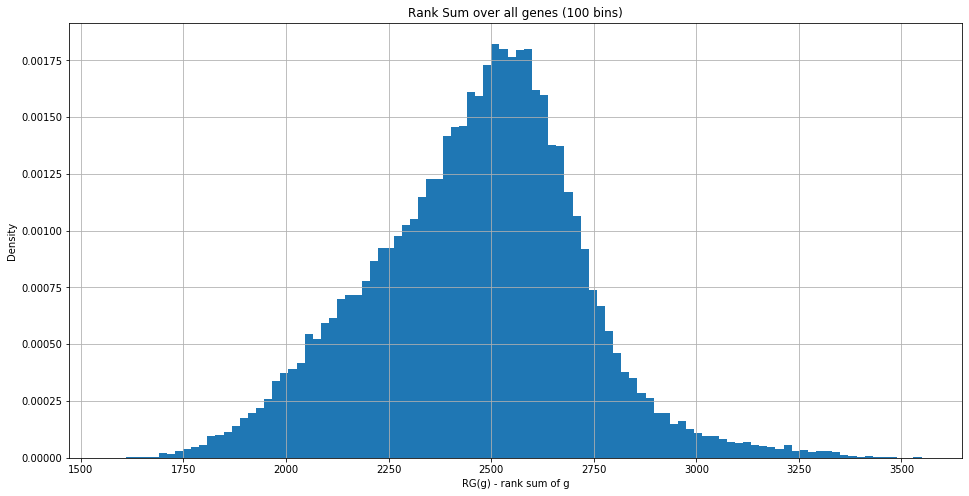

mean   = 2462
median = 2482


In [16]:
M_class = (df.Class == 'M')
ranked_df = df.iloc[:,2:].apply(lambda col: col.rank()[M_class].sum(), axis=0)

plt.figure(figsize=(16,8))
ranked_df.hist(bins=100,density=True)
plt.title("Rank Sum over all genes (100 bins)")
plt.ylabel("Density")
plt.xlabel("RG(g) - rank sum of g")
plt.show()

print('mean   = ' + str(round(ranked_df.mean())))
print('median = ' + str(round(ranked_df.median())))

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### c. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M.  
Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.   
Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.05 and separately genes underexpressed in M vs H at a p-value of 0.05. For both directions use both a Student t-test and a WRS test.  

In [17]:
ALPHA = 0.05

df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.2573,13.2662,14.5712,14.2766,4.50466,3.13933,2.74701,2.65155,3.41343,3.14061
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.5939,13.517,14.7388,14.3412,4.40923,3.03996,2.63861,2.64362,3.39906,3.13269
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.3728,13.4166,14.6272,14.3186,4.31008,3.22011,2.49526,2.62603,3.53997,3.6984
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.4902,13.4948,14.7541,14.3633,4.43931,3.26378,2.5442,2.50496,3.39623,3.63861
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.2368,13.3302,14.5484,14.2637,4.56288,3.13852,2.50663,2.60971,3.43472,3.57765


##### T-Test
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.  
So I should double the ALPHA.

In [18]:
ALPHA = 0.05*2

# get vectors by Class
M_class = (df.Class == 'M')
H_class = (df.Class == 'H')

# convers df to numeric values
df_numeric = df.drop(['Class','ID_REF'],axis=1).astype('float',errors='ignore')

# get the all numeric values separate by Class
df_M = df_numeric[M_class]
df_H = df_numeric[H_class]

# preforme T-test on all columns(genes)
df_ttest = pd.DataFrame(ss.ttest_ind(df_M,df_H,axis=0,nan_policy='omit'),index=['statistic','pvalue'],columns=df_M.columns).T

pvalue_significant = df_ttest.pvalue <= ALPHA

print('The number of overexpressed genes  = ' + str((df_ttest[pvalue_significant].statistic>0).sum()) )
print('The number of underexpressed genes = ' + str((df_ttest[pvalue_significant].statistic<=0).sum()) )

The number of overexpressed genes  = 7067
The number of underexpressed genes = 7467


##### WRS-test

Also as before, this is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.  
So I should double the ALPHA.  

Furthermore, due to the nature of the ranksums() function I need to iterate over each column.  

In [19]:
ALPHA = 0.05*2

def func_wrs(gene):
    ## defining the two independent samples
    m = gene[df['Class'] == "M"]
    h = gene[df['Class'] == "H"]
    return ss.ranksums(m,h)

# preforme wrs-test on all columns(genes)
df_wrs = df.iloc[:,2:].apply(func_wrs, result_type="expand")

# getting the overexpressed genes
df_wrs_overexpressed = df_wrs.T[(df_wrs.T.iloc[:,0] > 0) & (df_wrs.T.iloc[:,1] <= ALPHA)]

# getting the underexpressed genes
df_wrs_underexpressed = df_wrs.T[(df_wrs.T.iloc[:,0] <= 0) & (df_wrs.T.iloc[:,1] <= ALPHA)]

# print result
print('The number of overexpressed genes  = ' + str(len(df_wrs_overexpressed)) )
print('The number of underexpressed genes = ' + str(len(df_wrs_underexpressed)) )

The number of overexpressed genes  = 8991
The number of underexpressed genes = 9424


<br>

SELF NOTE: As a bonus, I tried to build a faster code but I could not understand why it has different result!

In [20]:
# ALPHA = 0.05*2

# # get vectors by Class
# M_class = (df.Class == 'M')
# H_class = (df.Class == 'H')

# # convers df to numeric values
# df_numeric = df.drop(['Class','ID_REF'],axis=1).astype('float',errors='ignore')

# # get the all numeric values separate by Class
# df_M = df_numeric[M_class]
# df_H = df_numeric[H_class]

# # temp arrays
# statistics = []
# pvalues = []

# # iterate over cols
# for m,h in zip(df_M.values.T,df_H.values.T):
#     statistic,pvalue = ss.ranksums(m,h)
#     statistics.append(statistic)
#     pvalues.append(pvalue)

# # create and insert data to dataframe
# df_wrs_test = pd.DataFrame(columns=['statistic','pvalue'])
# df_wrs_test['statistic'] = statistics
# df_wrs_test['pvalue'] = pvalues

# # transforme to the way I would like to see it
# df_wrs_test.index = df_numeric.columns

# pvalue_significant_wrs = df_wrs_test.pvalue <= (ALPHA)

# print('The number of overexpressed genes  = ' + str((df_wrs_test[pvalue_significant_wrs].statistic>0).sum()) )
# print('The number of underexpressed genes = ' + str((df_wrs_test[pvalue_significant_wrs].statistic<=0).sum()) )


### The number of overexpressed genes  = 9019
### The number of underexpressed genes = 9476

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### d. Correlations
Select the 60 most significant genes from each one of the one-sided WRS DE lists you computed in 3c.

NOTE : It seems like the Q's has an error. Cuz as I'll take 60 from each - I'll probably would have duplicates, then it wont be 120 chooce 2, but 120-duplicates choose 2. I'll ignore it for now..

In [21]:
select_number = 60 

# from the columns with the significant pvalue by wrs test, choose the over & get the most significant
over = df_wrs_overexpressed.nsmallest(n=select_number,columns=1)

# from the columns with the significant pvalue by wrs test, choose the under & get the most significant
under = df_wrs_underexpressed.nsmallest(n=select_number,columns=1)

Generate a set of 120 genes, D, which is the union of the above two sets. 

In [22]:
# combine to one dataset into D (over & under)
D = over.append(under).sort_values(by=1)
D

,0,1
0,,
208869_s_at,7.691398,1.455362e-14
216248_s_at,7.663404,1.810692e-14
204622_x_at,7.348469,2.004896e-13
244054_at,7.229494,4.847969e-13
203887_s_at,7.215497,5.373737e-13
...,...,...
239862_at,-5.073943,3.896557e-07
241582_at,-5.073943,3.896557e-07
203476_at,-5.059946,4.193753e-07


Compute Spearman rho correlations in all pairs within D (120 choose 2 numbers).   

In [23]:
# D_spearman = df_numeric[D.drop_duplicates().index.values].corr(method='spearman')
D_spearman = df_numeric[D.index.values].corr(method='spearman')
D_spearman

,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,219494_at,1560147_at,213317_at,219532_at,223671_x_at,239862_at,241582_at,203476_at,204236_at,218607_s_at
0,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.857205,0.798330,0.635028,0.621620,0.616005,0.686902,0.792900,0.697638,0.657897,...,-0.456130,-0.407347,-0.447941,-0.338058,-0.278788,-0.446691,-0.463760,-0.363080,-0.378746,-0.307817
216248_s_at,0.857205,1.000000,0.946320,0.660173,0.570043,0.565071,0.663562,0.773939,0.687372,0.648584,...,-0.613094,-0.404811,-0.500532,-0.427644,-0.396858,-0.489264,-0.555622,-0.348114,-0.475728,-0.471985
204622_x_at,0.798330,0.946320,1.000000,0.669734,0.559604,0.569487,0.643896,0.769017,0.643649,0.591243,...,-0.570113,-0.353915,-0.489771,-0.465826,-0.397638,-0.502993,-0.551899,-0.311787,-0.464776,-0.458442
244054_at,0.635028,0.660173,0.669734,1.000000,0.726679,0.732863,0.706964,0.749190,0.646184,0.765108,...,-0.554405,-0.411503,-0.505331,-0.563117,-0.618071,-0.366271,-0.483228,-0.412257,-0.434132,-0.566592
203887_s_at,0.621620,0.570043,0.559604,0.726679,1.000000,0.921781,0.684712,0.670897,0.665046,0.649276,...,-0.427695,-0.466877,-0.489338,-0.460804,-0.427631,-0.317873,-0.383636,-0.398256,-0.356482,-0.408324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239862_at,-0.446691,-0.489264,-0.502993,-0.366271,-0.317873,-0.392059,-0.350724,-0.318541,-0.275387,-0.323661,...,0.473100,0.314595,0.503179,0.584403,0.332294,1.000000,0.573074,0.185665,0.504219,0.470835
241582_at,-0.463760,-0.555622,-0.551899,-0.483228,-0.383636,-0.432220,-0.356685,-0.328002,-0.335053,-0.326481,...,0.625673,0.374150,0.641991,0.588027,0.571911,0.573074,1.000000,0.183476,0.675246,0.694298
203476_at,-0.363080,-0.348114,-0.311787,-0.412257,-0.398256,-0.384378,-0.381608,-0.403772,-0.470216,-0.496735,...,0.252444,0.295288,0.192096,0.241101,0.196809,0.185665,0.183476,1.000000,0.346600,0.250897


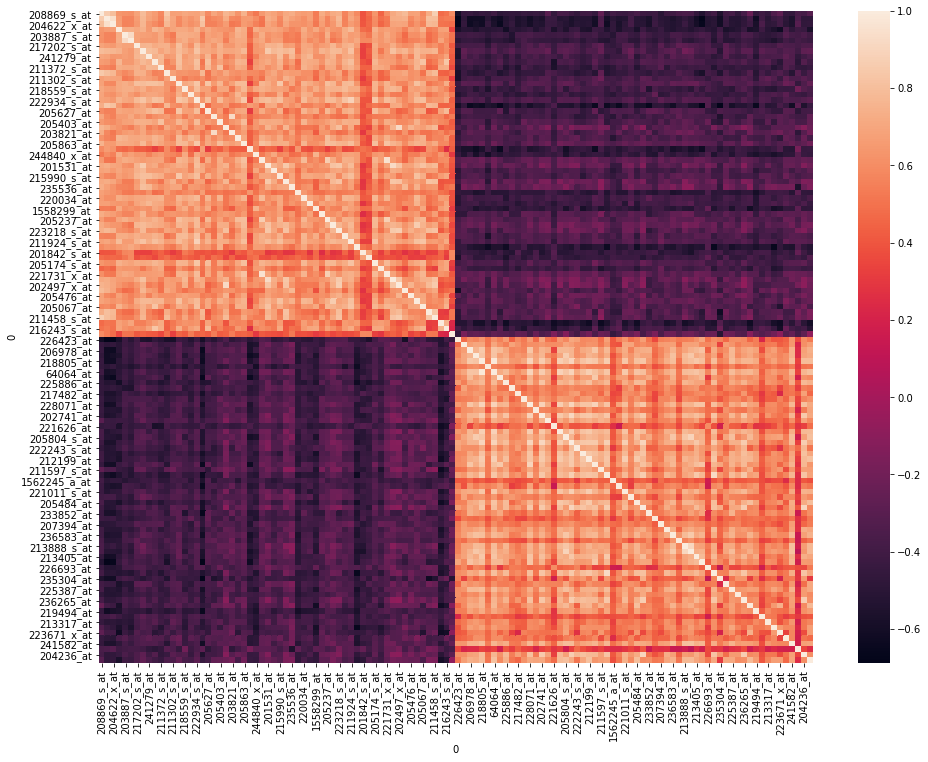

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(D_spearman)

##### 1. What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)? Do we observe any significant co-expression? If so how many pairs, etc.

In order to answer that I should test for spearman rho and pvalue.

In [25]:
ALPHA = 0.05*2
Correlation_threshhold = 0.5

def calculate_correlations_and_pvalues(data):
    number_of_genes = len(data.columns)
    
    # initial
    correlations = np.empty([number_of_genes, number_of_genes])
    pvalues = np.empty([number_of_genes, number_of_genes])
    
    for i in range(number_of_genes):
        for j in range(number_of_genes):
            c, p = ss.spearmanr(data.iloc[:,i],data.iloc[:,j])
            correlations[i,j] = c
            pvalues[i,j] = p
    
    return correlations, pvalues

corrs , ps =  calculate_correlations_and_pvalues(df_numeric[D.index.values])

# Choose pairs with pvalue<0.05*2 and corr>0.5
significant = ps[np.where(ps < ALPHA) and np.where(corrs > Correlation_threshhold)]

# both sides are the same & remove compare with itself
significant_pairs = int((len(significant) - len(D.index.values)) / 2) 

# calculations of combination of pairs
num_pairs = sp.special.comb(df_numeric[D.index.values].shape[1],2)

print('Total possible pairs: ' + str(int(num_pairs)))
print("Significant co-expressed gene pairs: {}".format(significant_pairs))

Total possible pairs: 7140
Significant co-expressed gene pairs: 2752


##### 2. What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

<u>Disadvantages</u>
- Time: In our data there are more then 54K genes, looking at every pair (+54K choose 2) around 1.5 billion pairs will probably take a long time.
- Computation: I'll have to use a lot of computational power in order to compute this proccess on the 1.5 billion pairs 
- Visualizing: much eaier to visualize the trends and results with D.

<u>Advantages:</u>
- I'll have an analysis of the entire data (genes).
- No missing information! As significant co-expressions etc.
- Trends in D might not represent the trends in all the data.
- Reconizing outliers.

##### 3. Perform the above steps on the same set D, but restrict attention only to samples labeled M. What do you see now? Can you explain this?

In [26]:
ALPHA = 0.05*2 

# targetiong only on M
D_M = df[df.Class=='M'][D.index.values]
D_M.shape

(49, 120)

In [27]:
ALPHA = 0.05*2
Correlation_threshhold = 0.5

def calculate_correlations_and_pvalues(data):
    number_of_genes = len(data.columns)
    
    # initial
    correlations = np.empty([number_of_genes, number_of_genes])
    pvalues = np.empty([number_of_genes, number_of_genes])
    
    for i in range(number_of_genes):
        for j in range(number_of_genes):
            c, p = ss.spearmanr(data.iloc[:,i],data.iloc[:,j])
            correlations[i,j] = c
            pvalues[i,j] = p
    
    return correlations, pvalues

corrs , ps =  calculate_correlations_and_pvalues(D_M)

# Choose pairs with pvalue<0.05*2 and corr>0.5
significant = ps[np.where(ps < ALPHA) and np.where(corrs > Correlation_threshhold)]

# both sides are the same & remove compare with itself
significant_pairs = int((len(significant) - D_M.shape[1]) / 2) 

# calculations of combination of pairs
num_pairs = sp.special.comb(D_M.shape[1],2)

print('Total possible pairs: ' + str(int(num_pairs)))
print("Significant co-expressed gene pairs: {}".format(significant_pairs))

Total possible pairs: 7140
Significant co-expressed gene pairs: 1678


In [28]:
D_M_spearman = D_M.astype('float').corr(method='spearman')
D_M_spearman

,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,219494_at,1560147_at,213317_at,219532_at,223671_x_at,239862_at,241582_at,203476_at,204236_at,218607_s_at
0,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.776837,0.751735,0.403673,0.477347,0.433061,0.461633,0.518980,0.363776,0.192551,...,-0.363878,-0.240816,-0.343878,-0.240102,0.021837,-0.155510,-0.431429,0.095408,-0.118367,-0.086939
216248_s_at,0.776837,1.000000,0.949694,0.379592,0.335102,0.269694,0.390102,0.421735,0.168878,0.122551,...,-0.509694,-0.208061,-0.420306,-0.266327,-0.018980,-0.203878,-0.470000,0.148878,-0.110816,-0.183163
204622_x_at,0.751735,0.949694,1.000000,0.440918,0.319796,0.293367,0.398469,0.444490,0.149184,0.146429,...,-0.563367,-0.243776,-0.439592,-0.322551,-0.071327,-0.222857,-0.532041,0.136224,-0.189286,-0.242143
244054_at,0.403673,0.379592,0.440918,1.000000,0.557347,0.549898,0.679490,0.716735,0.549286,0.705102,...,-0.298980,-0.249490,-0.380510,-0.420102,-0.336633,-0.028878,-0.180510,-0.239388,-0.045510,-0.105612
203887_s_at,0.477347,0.335102,0.319796,0.557347,1.000000,0.944082,0.546633,0.590714,0.401122,0.450816,...,-0.037347,-0.190102,-0.325204,-0.209592,-0.073469,-0.059898,-0.059184,-0.015714,0.227551,0.115714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239862_at,-0.155510,-0.203878,-0.222857,-0.028878,-0.059898,-0.106020,-0.083469,0.053367,0.205510,0.013163,...,0.307959,0.154082,0.459388,0.527653,0.165510,1.000000,0.525816,-0.183367,0.403061,0.435714
241582_at,-0.431429,-0.470000,-0.532041,-0.180510,-0.059184,-0.080918,-0.236020,-0.077551,0.044082,-0.009388,...,0.491122,0.218265,0.625000,0.422959,0.197143,0.525816,1.000000,-0.033776,0.512959,0.485102
203476_at,0.095408,0.148878,0.136224,-0.239388,-0.015714,0.025816,-0.033776,-0.098265,-0.127041,-0.227245,...,0.112755,0.280000,-0.073163,-0.011633,0.070000,-0.183367,-0.033776,1.000000,0.043673,0.137653


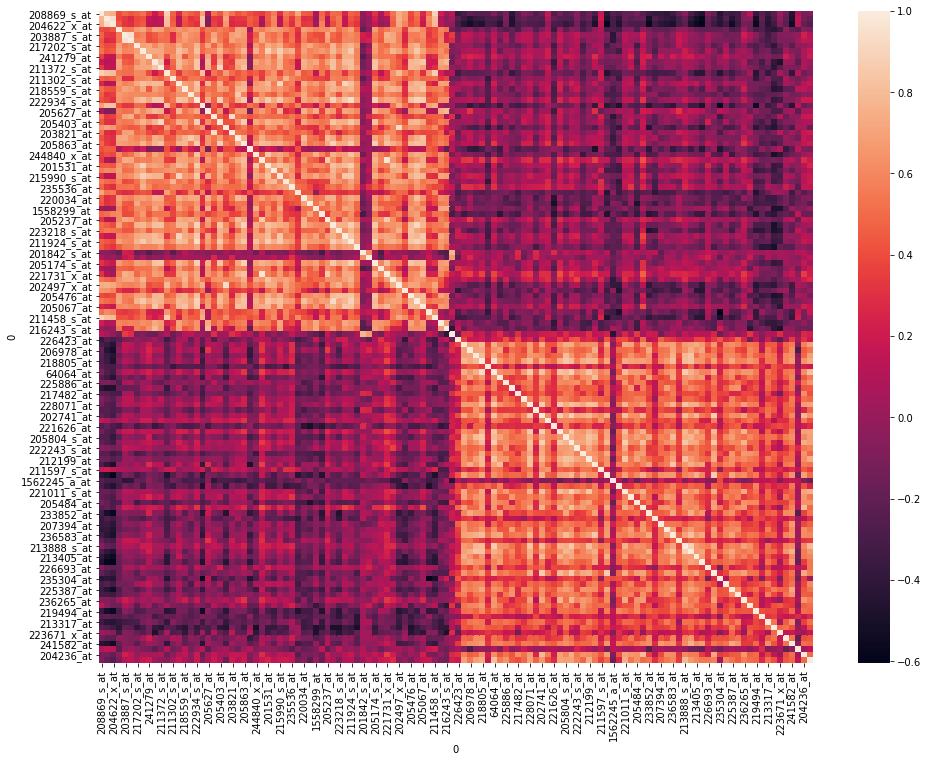

In [29]:
plt.figure(figsize=(16,12))
sns.heatmap(D_M_spearman)

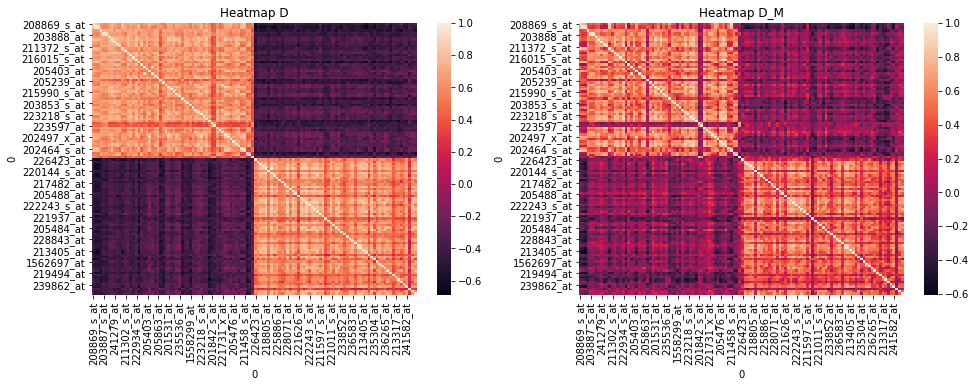

In [30]:
bins = 100
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.xlim(-10, 1000)
plt.title('Heatmap D')
sns.heatmap(D_spearman)

plt.subplot(1, 2, 2)
plt.title('Heatmap D_M')
sns.heatmap(D_M_spearman)

plt.show()

It's easy to see the difference between the heatmap:
- As expected, both heatmap has similar behavior
- As expected, in the D_M's heatmap the correlation values are weaker (ligher purple, darker orange).

This is due to the my focus only in class M.

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### e. Plots and Conclusions of the DE and correlation analysis

#### 1. Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.   

    State, for each comparison, the number of genes, k, at which we observe:  
	FDR = 0.1  
	FDR = 0.05  
	FDR = 0.001   
    If these events are not observed at any k, then make that statement.  

In [31]:
ks = [0.1, 0.05, 0.001]
epsilon = 0.00001

df_numeric.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,10.742427,7.270561,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,9.865655,4.810195,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,10.148454,7.822844,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,10.879913,5.690417,...,13.490226,13.494827,14.754124,14.363296,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,10.090525,7.089369,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649


##### WRS

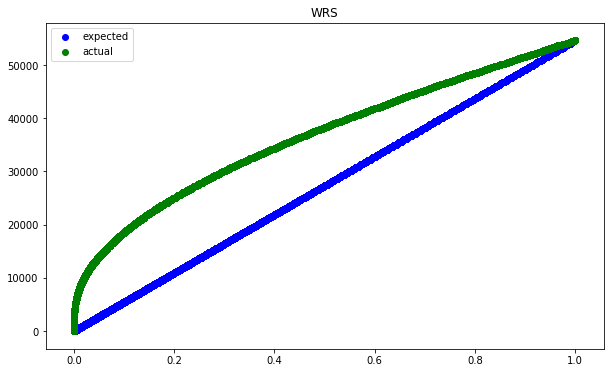

For fdr <= 0.1 there are 9477 genes
For fdr <= 0.05 there are 6678 genes
For fdr <= 0.001 there are 1312 genes


In [32]:
# get h & m
h = df_numeric.loc[df['Class']=='H']
m = df_numeric.loc[df['Class']=='M']

# initial
pvals = []

# get RS
for column in df_numeric.columns[:-1]:
    pvals.append(ss.ranksums(h[column],m[column])[1])

# calculations
pvalues = pd.Series(pvals)
pvalues_ranks = pvalues.rank(method='max')
pvalues_expected = pvalues * len(pvalues)
fdr = pvalues_expected / pvalues_ranks

# visual
plt.figure(figsize=(10,6))
plt.scatter(pvalues, pvalues_expected, label="expected",c='b')
plt.scatter(pvalues, pvalues_ranks, label="actual",c='g')
plt.title('WRS')
plt.legend()
plt.show()

# print numeric
for k in ks:
    print("For fdr <= {0} there are {1} genes".format(k,fdr[fdr <= k + epsilon].count()))

##### T-test

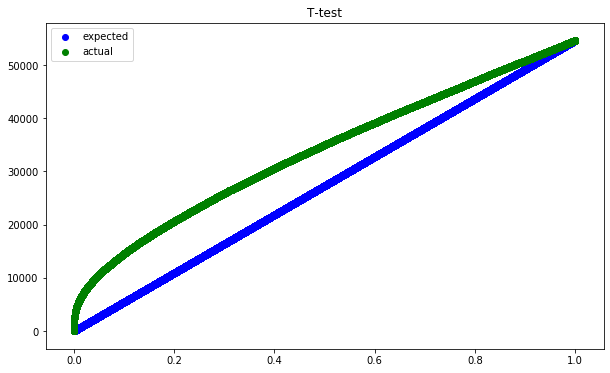

For fdr <= 0.1 there are 5700 genes
For fdr <= 0.05 there are 3974 genes
For fdr <= 0.001 there are 963 genes


In [33]:
# get h & m
h = df_numeric.loc[df['Class']=='H']
m = df_numeric.loc[df['Class']=='M']

# initial
pvals = []

# get RS
for column in df_numeric.columns[:-1]:
    pvals.append(ss.ttest_ind(h[column].astype(float), m[column].astype(float))[1])

# calculations
pvalues = pd.Series(pvals)
pvalues_ranks = pvalues.rank(method='max')
pvalues_expected = pvalues * len(pvalues)
fdr = pvalues_expected / pvalues_ranks

# visual
plt.figure(figsize=(10,6))
plt.scatter(pvalues, pvalues_expected, label="expected",c='b')
plt.scatter(pvalues, pvalues_ranks, label="actual",c='g')
plt.title('T-test')
plt.legend()
plt.show()

# print numeric
for k in ks:
    print("For fdr <= {0} there are {1} genes".format(k,fdr[fdr <= k + epsilon].count()))

#### 2. What can you say about the difference in results obtained in WRS vs those obtained by Student t-test?

My observations seems like for higher FDR - WRS detects more genes (WRS gives smaller p-values).  
I guess it's due to the nature of the normal distribution that T-test draws from, while WRS does not.   
Also, (Although while I not 100% sure it's effecting here) T-test will be more effected by outliers compare to WRS.

#### 3. Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

I used kdeplot,boxplot and violinplot.

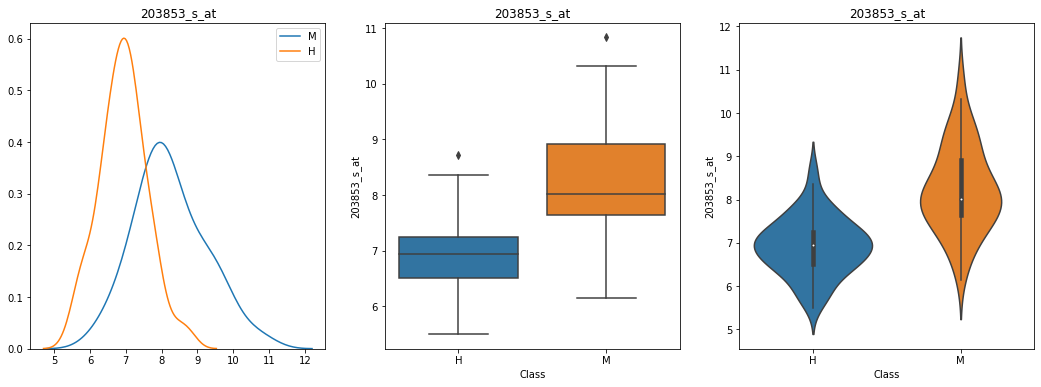

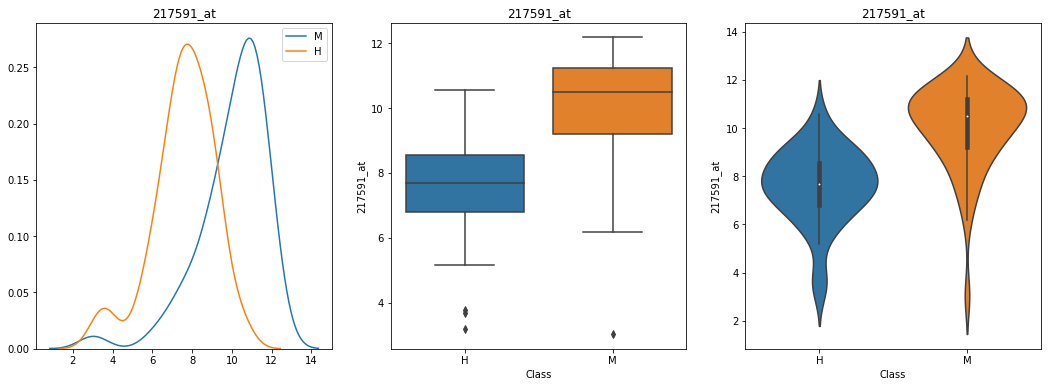

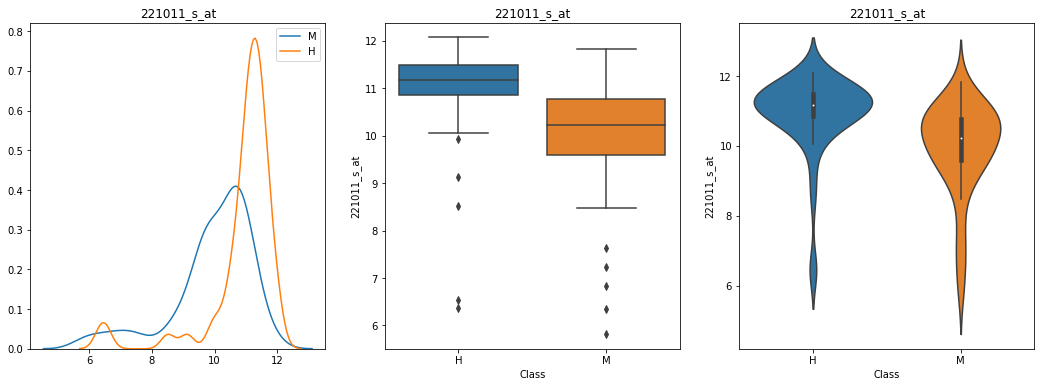

In [34]:
samples = D.sample(n=3)
samples = df[samples.index]    
samples = samples.astype('float')
samples['Class'] = df.Class


for c in samples.columns.drop('Class'):
    plt.figure(figsize=(18,6))
    
    # kdeplot
    plt.subplot(1, 3, 1)
    sns.kdeplot(data=samples[samples.Class=='M'][c], label="M")
    sns.kdeplot(data=samples[samples.Class=='H'][c], label="H")
    plt.title(c)
    
    # box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data=samples,x='Class',y=c)
    plt.title(c)
        
    
    # violent plot
    plt.subplot(1, 3, 3) 
    sns.violinplot(x="Class", y=c, data=samples,orient='v')
    plt.title(c)
    plt.show()    

    
    

# D_samples.apply(plot_samples, axis=0)
print()

I can see the different distributions of H and M.    
Also, the pmf & mean & IQR between the H and M comes from different distributions.

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### f. Heatmap
Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples).   Order the genes and the samples to produce the maximal visual effect.  



##### As I showed before in D1

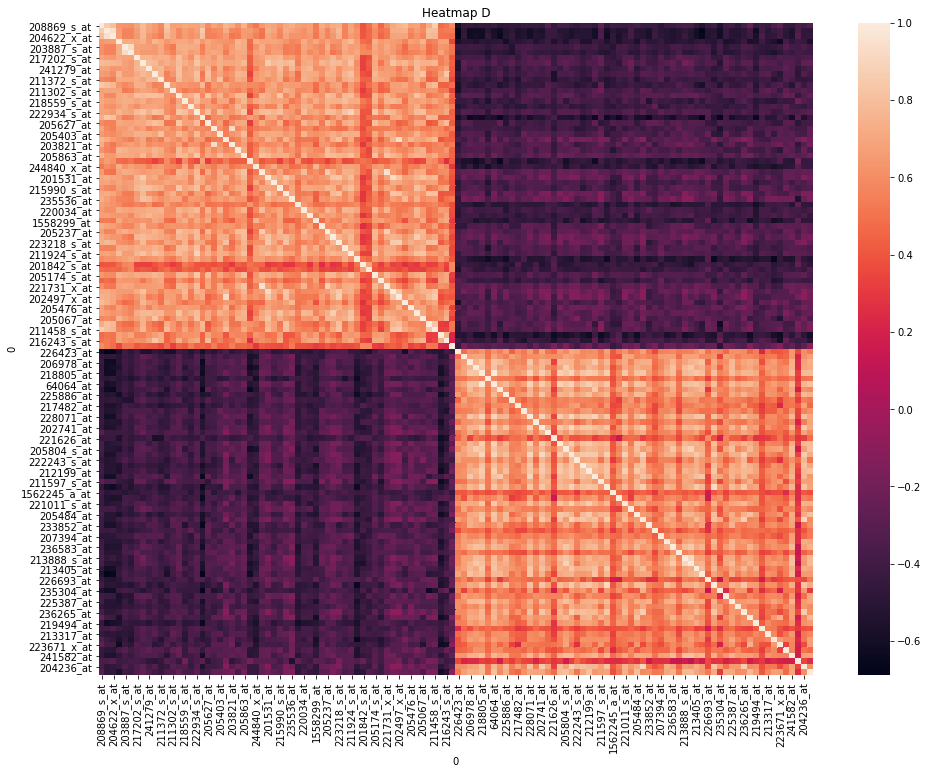

In [35]:
plt.figure(figsize=(16,12))

plt.title('Heatmap D')
sns.heatmap(D_spearman)

plt.show()

##### As I showed before in D3

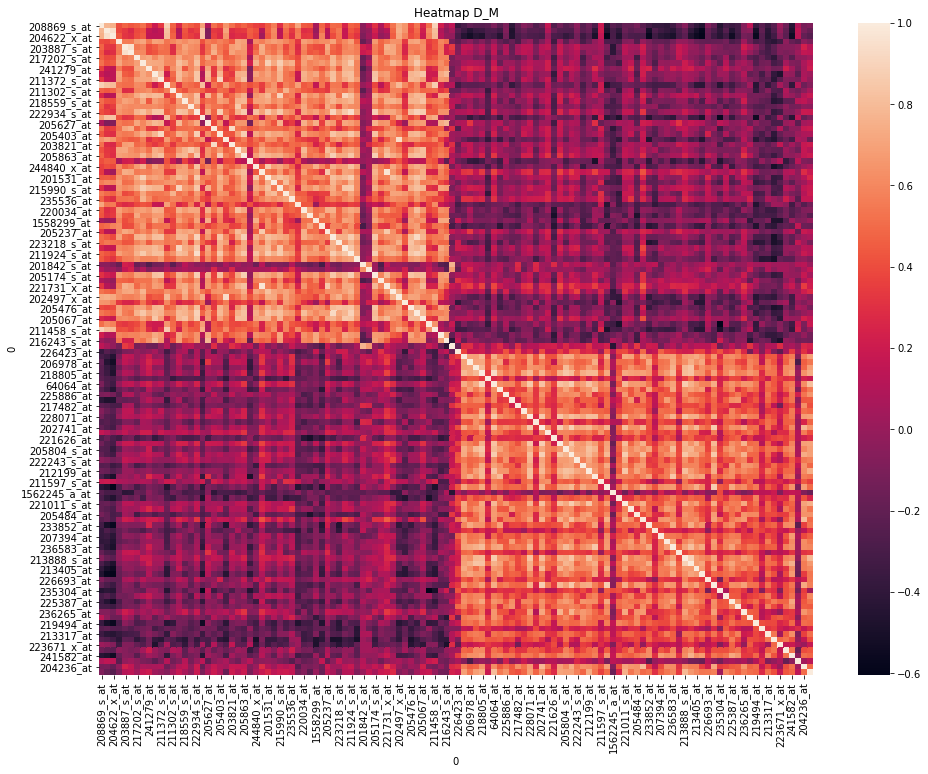

In [36]:
plt.figure(figsize=(16,12))

plt.title('Heatmap D_M')
sns.heatmap(D_M_spearman)

plt.show()